# Project
Due Dec 14

PCA Lesson: https://online.stat.psu.edu/stat505/lesson/11

* Data: Boyer, Rick, and David Savageau. Places rated almanac: Your guide to finding the best places to live in America. Rand McNally & Company, 1985. 
* Data: http://www.stat.nthu.edu.tw/~swcheng/Teaching/stat5191/assignment/places.txt

1) Normalize the data (apply log, subtract mean, normalize std dev)

2) Perform PCA (use SVD or the eigenvalue decomposition of the covariance matrix)

3) Plot the Scree plot. How much variance is explained by the first three PCs?

4) Scatter plot all communities along two of the PCs (PC0 vs PC1 or PC1 vs PC2)

5) Scatter plot all original dimensions in the space of PC0 and PC1.

6) Do something interesting as you like.


In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import csv
from datetime import datetime
import numpy as np
from scipy import signal


# standard libs
import os
import pandas as pd
import re
import json
import seaborn as sns #visualisation
import statistics 

#ML with sklearn
from sklearn.preprocessing import StandardScaler
from matplotlib.cm import register_cmap
from scipy import stats
from sklearn.decomposition import PCA as PCA
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler

In [2]:
ls

Final_Project_ML_Borovkova.ipynb  places_updated.csv
places.csv


In [3]:
# import dat
df = pd.read_csv('places_updated.csv')


In [4]:
df.info()
print("DATA INFO: ",np.shape(df))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 329 entries, 0 to 328
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Climate_and_Terrain          329 non-null    int64 
 1   Housing                      329 non-null    int64 
 2   Health_Care_and_Environment  329 non-null    int64 
 3   Crime                        329 non-null    int64 
 4   Transportation               329 non-null    int64 
 5   Education                    329 non-null    int64 
 6   The_Arts                     329 non-null    int64 
 7   Recreation                   329 non-null    int64 
 8   Economics                    329 non-null    int64 
 9   City                         329 non-null    object
 10  State                        329 non-null    object
 11  State1                       329 non-null    object
 12  State2                       33 non-null     object
 13  State3                       3 non-

In [5]:
df

Climate_and_Terrain  Housing  Health_Care_and_Environment  Crime  \
0                    560     5530                          598   1125   
1                    612     6811                         1692   1123   
2                    336     5708                          593    930   
3                    546     5962                          607    516   
4                    526     5382                          622    749   
..                   ...      ...                          ...    ...   
324                  460    10176                         3053    826   
325                  496     8943                          931   1055   
326                  442     8121                          593    450   
327                  308     7642                          818    442   
328                  401     9839                          345    989   

     Transportation  Education  The_Arts  Recreation  Economics        City  \
0              3051       2189       268        1165       4730    Anniston   
1              5177       2851      3958        1234       4843  Birmingham   
2              2232       2230       117         714       5453     Dothgan   
3              1454       2427      1021         994       4492    Florence   
4              2174       2299       153         300       4220     Gadsden   
..              ...        ...       ...         ...        ...         ...   
324            4945       3044      8766        2902       4982   Milwaukee   
325            3558       2732      1171        2016       4415      Racine   
326            3458       2557       268        1316       4765   Sheboygan   
327            3496       2749       761        1654       4300      Wausau   
328            4410       2453       303        1435       6303      Casper   

         State State1 State2 State3  
0      ALABAMA     AL    NaN    NaN  
1      ALABAMA     AL    NaN    NaN  
2      ALABAMA     AL    NaN    NaN  
3      ALABAMA     AL    NaN    NaN  
4      ALABAMA     AL    NaN    NaN  
..         ...    ...    ...    ...  
324  WISCONSIN     WI    NaN    NaN  
325  WISCONSIN     WI    NaN    NaN  
326  WISCONSIN     WI    NaN    NaN  
327  WISCONSIN     WI    NaN    NaN  
328    WYOMING     WY    NaN    NaN  

[329 rows x 14 columns]

<Figure size 720x720 with 0 Axes>

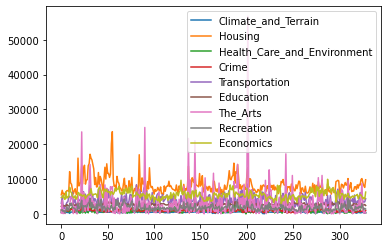

<Figure size 720x720 with 0 Axes>

In [6]:
df.plot()
plt.figure(figsize=(10,10))

<Figure size 720x1440 with 0 Axes>

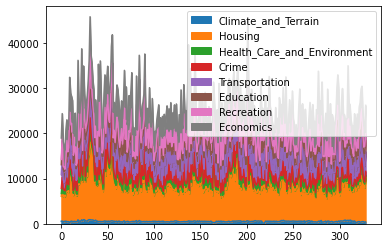

<Figure size 720x1440 with 0 Axes>

In [7]:
columns = ['Climate_and_Terrain','Housing','Health_Care_and_Environment', 'Crime','Transportation','Education','Recreation','Economics']
df[columns].plot.area()
plt.figure(figsize=(10,20))

<Figure size 1440x1440 with 0 Axes>

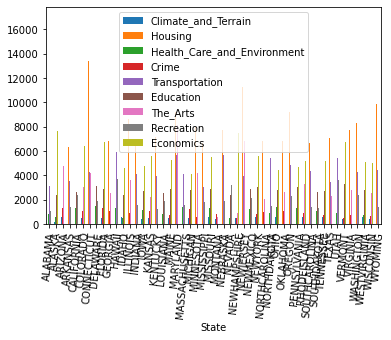

<Figure size 1440x1440 with 0 Axes>

In [8]:
df.groupby('State').mean().plot.bar()
plt.xticks(rotation=85)
plt.figure(figsize=(20,20))

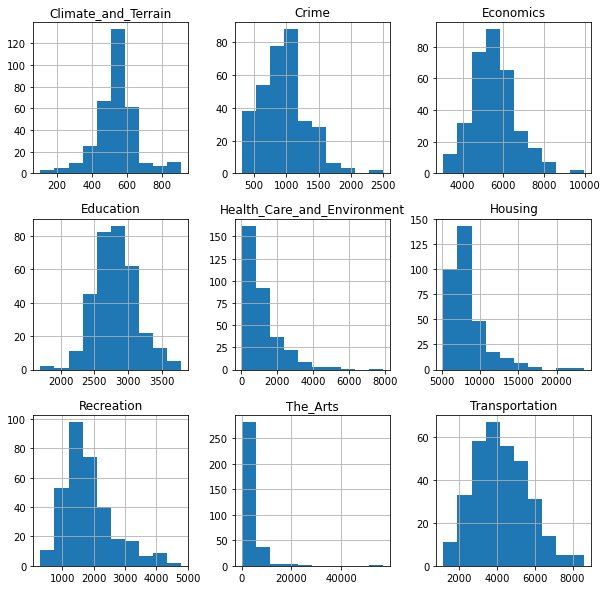

In [9]:
df.hist(figsize=(10,10))
plt.show()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fe45a17cb20>,
      dtype=object)

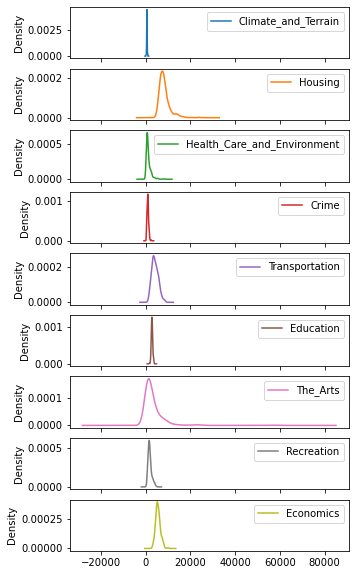

In [10]:
#kernel density function
df.plot.kde(subplots=True, figsize=(5,10))

(array([1, 2, 3, 4, 5, 6, 7, 8]), <a list of 8 Text major ticklabel objects>)

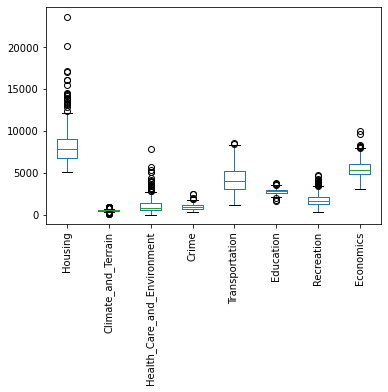

In [11]:
columns = ['Housing','Climate_and_Terrain','Health_Care_and_Environment', 'Crime','Transportation','Education','Recreation','Economics']
df[columns].plot.box()
plt.xticks(rotation='vertical')
#For Housing and Crime, the lower the score the better.


# Principal Component Analysis (PCA) with Python
#### Inspired by District Data Labs 
https://medium.com/district-data-labs/principal-component-analysis-with-python-4962cd026465 

#### Step 1: Load and Standardize Data
First we’ll load the data and store it in a pandas dataframe. The data set contains 9 categories (instances) for 329 cities (features). We need to make sure that we standardize the data by transforming it onto a unit scale (mean=0 and variance=1). Also, all null (NaN) values needs to converted to 0. It is necessary to transform data because PCA can only be applied on numerical data.

In [12]:
#Load dependencies
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from matplotlib import*
import matplotlib.pyplot as plt
from matplotlib.cm import register_cmap
from scipy import stats
from sklearn.decomposition import PCA as sklearnPCA
import seaborn

#Load movie names and movie ratings
# import cities
places = pd.read_csv('places.csv')
places.shape
places

Climate_and_Terrain  Housing  Health_Care_and_Environment  Crime  \
0                    521     6200                          237    923   
1                    575     8138                         1656    886   
2                    468     7339                          618    970   
3                    476     7908                         1431    610   
4                    659     8393                         1853   1483   
..                   ...      ...                          ...    ...   
324                  562     8715                         1805    680   
325                  535     6440                          317   1106   
326                  540     8371                          713    440   
327                  570     7021                         1097    938   
328                  608     7875                          212   1179   

     Transportation  Education  The_Arts  Recreation  Economics  \
0              4031       2757       996        1405       7633   
1              4883       2438      5564        2632       4350   
2              2531       2560       237         859       5250   
3              6883       3399      4655        1617       5864   
4              6558       3026      4496        2612       5727   
..              ...        ...       ...         ...        ...   
324            3643       3299      1784         910       5040   
325            3731       2491       996        2140       4986   
326            2267       2903      1022         842       4946   
327            3374       2920      2797        1327       3894   
328            2768       2387       122         918       4694   

                          Place  Place_ID State                     City  
0                    Abilene_TX         1    TX                  Abilene  
1                      Akron_OH         2    OH                    Akron  
2                     Albany_GA         3    GA                   Albany  
3    Albany-Schenectady-Troy_NY         4    NY  Albany-Schenectady-Troy  
4                Albuquerque_NM         5    NM              Albuquerque  
..                          ...       ...   ...                      ...  
324                Worcester_MA       325    MA                Worcester  
325                   Yakima_WA       326    WA                   Yakima  
326                     York_PA       327    PA                     York  
327        Youngstown-Warren_OH       328    OH        Youngstown-Warren  
328                Yuba_City_CA       329    CA                Yuba_City  

[329 rows x 13 columns]

In [13]:
columns = ['Place_ID','Housing','Climate_and_Terrain','Health_Care_and_Environment', 'Crime','Transportation','Education','The_Arts','Recreation','Economics']
df1 = places[columns]
df1

Place_ID  Housing  Climate_and_Terrain  Health_Care_and_Environment  \
0           1     6200                  521                          237   
1           2     8138                  575                         1656   
2           3     7339                  468                          618   
3           4     7908                  476                         1431   
4           5     8393                  659                         1853   
..        ...      ...                  ...                          ...   
324       325     8715                  562                         1805   
325       326     6440                  535                          317   
326       327     8371                  540                          713   
327       328     7021                  570                         1097   
328       329     7875                  608                          212   

     Crime  Transportation  Education  The_Arts  Recreation  Economics  
0      923            4031       2757       996        1405       7633  
1      886            4883       2438      5564        2632       4350  
2      970            2531       2560       237         859       5250  
3      610            6883       3399      4655        1617       5864  
4     1483            6558       3026      4496        2612       5727  
..     ...             ...        ...       ...         ...        ...  
324    680            3643       3299      1784         910       5040  
325   1106            3731       2491       996        2140       4986  
326    440            2267       2903      1022         842       4946  
327    938            3374       2920      2797        1327       3894  
328   1179            2768       2387       122         918       4694  

[329 rows x 10 columns]

In [14]:
df1 = df1.replace(np.nan, 0, regex=True)
X_std = StandardScaler().fit_transform(df1)

In [15]:
df1.shape

(329, 10)

In [16]:
X_std.shape

(329, 10)

#### Step 2: Covariance Matrix and Eigendecomposition
Next, a covariance matrix is created based on the standardized data. The covariance matrix is a representation of the covariance between each feature in the original dataset.
The covariance matrix can be found as follows

In [17]:
mean_vec = np.mean(X_std, axis=0)
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)

Covariance matrix 
[[ 1.00304878  0.09466014  0.10069515  0.01497082  0.04682273 -0.00592552
   0.02205154  0.0281953   0.05879501  0.00989363]
 [ 0.09466014  1.00304878  0.38746841  0.45439081  0.13463087  0.27275053
   0.19853732  0.44993535  0.42357584  0.27025421]
 [ 0.10069515  0.38746841  1.00304878  0.21395285  0.19297385  0.07936115
   0.06471647  0.22766619  0.21415997 -0.10038787]
 [ 0.01497082  0.45439081  0.21395285  1.00304878  0.30558826  0.47175096
   0.49172865  0.86843566  0.32638902  0.06948193]
 [ 0.04682273  0.13463087  0.19297385  0.30558826  1.00304878  0.28745214
   0.07464314  0.39067005  0.34567724  0.26078738]
 [-0.00592552  0.27275053  0.07936115  0.47175096  0.28745214  1.00304878
   0.33701686  0.46622266  0.36582818  0.05942738]
 [ 0.02205154  0.19853732  0.06471647  0.49172865  0.07464314  0.33701686
   1.00304878  0.37441703  0.0780444   0.12006529]
 [ 0.0281953   0.44993535  0.22766619  0.86843566  0.39067005  0.46622266
   0.37441703  1.00304878  0.379

After the covariance matrix is generated, eigendecomposition is performed on the covariance matrix. Eigenvectors and eigenvalues are found as a result of the eigendceomposition. Each eigenvector has a corresponding eigenvalue, and the sum of the eigenvalues represents all of the variance within the entire dataset.
The eigendecomposition can be performed as follows:

In [18]:
#Perform eigendecomposition on covariance matrix
cov_mat = np.cov(X_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 4.64338600e-02  9.54653918e-03  3.78497712e-02 -3.42629398e-01
   2.60035151e-01 -3.79380049e-02  7.48488068e-01  4.85325026e-01
   6.76557296e-02 -9.75479981e-02]
 [ 3.57189721e-01 -1.47302384e-02 -6.14736273e-01 -2.91624574e-01
   1.11344306e-01 -2.31455080e-01  1.19570360e-01 -5.15471312e-01
   1.35905752e-01 -2.11673850e-01]
 [ 2.07771274e-01 -1.93351253e-03  3.57051078e-01 -3.81314143e-01
   5.49836671e-01 -7.45923745e-02 -1.75904355e-01 -2.14681076e-01
  -3.90930984e-01  3.82360674e-01]
 [ 4.59041734e-01  7.16689904e-01  1.85406226e-01  2.82735102e-01
   1.01964921e-01  1.30460277e-02  3.28360278e-02 -6.83108693e-03
   3.70994341e-01  1.09512316e-01]
 [ 2.81259463e-01  5.79272612e-02 -4.30645506e-01 -2.60280571e-01
  -3.05655195e-01  1.76272082e-02 -2.53148294e-01  4.90978997e-01
  -8.16683242e-02  5.08710185e-01]
 [ 3.49904794e-01 -3.08684889e-03  9.65114627e-02  2.23387919e-01
  -8.89001663e-02 -5.82456471e-01 -1.08636286e-01  2.67213677e-01
  -4.63023954e-01 -

#### Step 3: Selecting Principal Components
Eigenvectors, or principal components, are a normalized linear combination of the features in the original dataset. The first principal component captures the most variance in the original variables, and the second component is a representation of the second highest variance within the dataset.

In [19]:
# Visually confirm that the list is correctly sorted by decreasing eigenvalues
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
3.423901146764469
0.12069066927231609
0.31805797424854465
1.244246983579077
1.1664649689025357
0.4938523222281734
0.9760880972529405
0.9028210451933193
0.6308975297236165
0.7534670677130532


In [20]:
#SVD decomposition to implement PCA
pca = PCA(n_components=2)
pca.fit_transform(df1)
print (pca.explained_variance_ratio_)

[0.75269386 0.13590447]


This output tells me that 75% of the dataset's variance lies along the first PC, 14% along second, and 5% along the third one. 


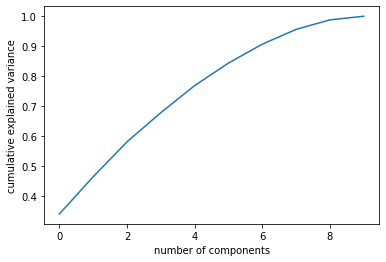

In [21]:
#Explained variance
pca = PCA().fit(X_std)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [22]:
pca.explained_variance_

array([3.42390115, 1.24424698, 1.16646497, 0.9760881 , 0.90282105,
       0.75346707, 0.63089753, 0.49385232, 0.31805797, 0.12069067])

In [23]:
X_std.shape

(329, 10)

# Visualization of the transposed dimensionality reduction, where the nine factors are shown in two dimensions

In [24]:
df1.keys()

Index(['Place_ID', 'Housing', 'Climate_and_Terrain',
       'Health_Care_and_Environment', 'Crime', 'Transportation', 'Education',
       'The_Arts', 'Recreation', 'Economics'],
      dtype='object')

In [25]:
scaler = StandardScaler()
scaler.fit(df1)

StandardScaler()

In [26]:
scaled_data = scaler.transform(df1)

In [27]:
pca = PCA(n_components=2)
pca.fit(scaled_data)

PCA(n_components=2)

In [28]:
x_pca = pca.transform(scaled_data) #X_train

In [29]:
scaled_data.shape

(329, 10)

In [30]:
x_pca.shape

(329, 2)

Text(0.5, 1.0, 'Economis')

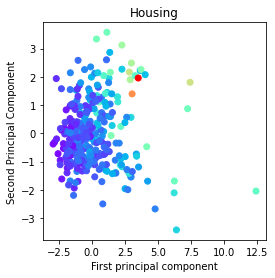

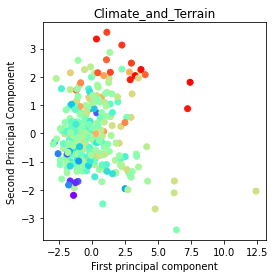

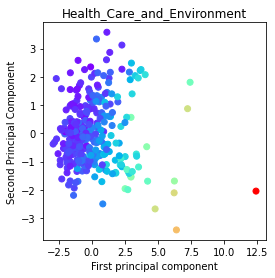

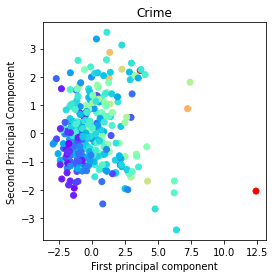

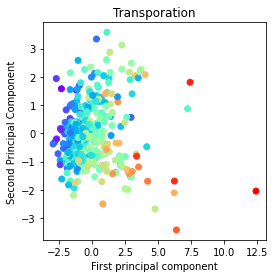

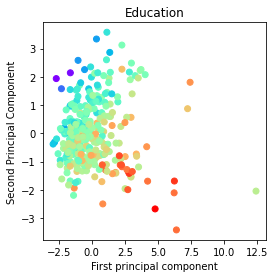

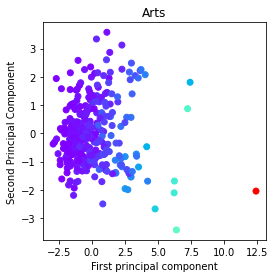

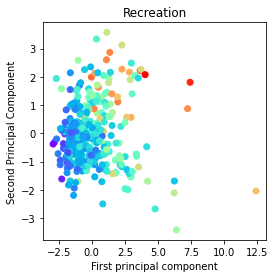

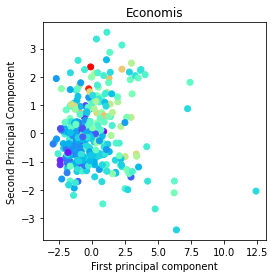

In [31]:
plt.figure(figsize=(4,4))
plt.scatter(x_pca[:,0],x_pca[:,1],c=df1['Housing'],cmap='rainbow')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')
plt.title('Housing')

plt.figure(figsize=(4,4))
plt.scatter(x_pca[:,0],x_pca[:,1],c=df1['Climate_and_Terrain'],cmap='rainbow')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')
plt.title('Climate_and_Terrain')

plt.figure(figsize=(4,4))
plt.scatter(x_pca[:,0],x_pca[:,1],c=df1['Health_Care_and_Environment'],cmap='rainbow')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')
plt.title('Health_Care_and_Environment')

plt.figure(figsize=(4,4))
plt.scatter(x_pca[:,0],x_pca[:,1],c=df1['Crime'],cmap='rainbow')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')
plt.title('Crime')

plt.figure(figsize=(4,4))
plt.scatter(x_pca[:,0],x_pca[:,1],c=df1['Transportation'],cmap='rainbow')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')
plt.title('Transporation')

plt.figure(figsize=(4,4))
plt.scatter(x_pca[:,0],x_pca[:,1],c=df1['Education'],cmap='rainbow')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')
plt.title('Education')

plt.figure(figsize=(4,4))
plt.scatter(x_pca[:,0],x_pca[:,1],c=df1['The_Arts'],cmap='rainbow')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')
plt.title('Arts')

plt.figure(figsize=(4,4))
plt.scatter(x_pca[:,0],x_pca[:,1],c=df1['Recreation'],cmap='rainbow')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')
plt.title('Recreation')

plt.figure(figsize=(4,4))
plt.scatter(x_pca[:,0],x_pca[:,1],c=df1['Economics'],cmap='rainbow')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')
plt.title('Economis')



##### Using heatmap
This heatmap and the color bar basically represent the correlation between principal components.

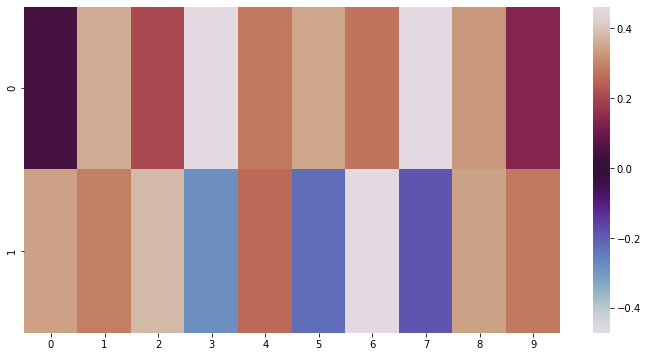

In [32]:
map= pd.DataFrame(pca.components_)
plt.figure(figsize=(12,6))
sns.heatmap(map,cmap='twilight')

In [33]:
X = df1[['Climate_and_Terrain','Health_Care_and_Environment','Transportation','Education','The_Arts','Recreation','Economics']]
X.shape

(329, 7)

In [34]:
df1.columns

Index(['Place_ID', 'Housing', 'Climate_and_Terrain',
       'Health_Care_and_Environment', 'Crime', 'Transportation', 'Education',
       'The_Arts', 'Recreation', 'Economics'],
      dtype='object')

# PCA Visualization in Python

Visualize Principle Component Analysis (PCA) of your high-dimensional data in Python with Plotly.

https://plotly.com/python/pca-visualization/

### Visualize all the original dimensions

In [35]:
# import cities
df = pd.read_csv('places_updated.csv')
df

Climate_and_Terrain  Housing  Health_Care_and_Environment  Crime  \
0                    560     5530                          598   1125   
1                    612     6811                         1692   1123   
2                    336     5708                          593    930   
3                    546     5962                          607    516   
4                    526     5382                          622    749   
..                   ...      ...                          ...    ...   
324                  460    10176                         3053    826   
325                  496     8943                          931   1055   
326                  442     8121                          593    450   
327                  308     7642                          818    442   
328                  401     9839                          345    989   

     Transportation  Education  The_Arts  Recreation  Economics        City  \
0              3051       2189       268        1165       4730    Anniston   
1              5177       2851      3958        1234       4843  Birmingham   
2              2232       2230       117         714       5453     Dothgan   
3              1454       2427      1021         994       4492    Florence   
4              2174       2299       153         300       4220     Gadsden   
..              ...        ...       ...         ...        ...         ...   
324            4945       3044      8766        2902       4982   Milwaukee   
325            3558       2732      1171        2016       4415      Racine   
326            3458       2557       268        1316       4765   Sheboygan   
327            3496       2749       761        1654       4300      Wausau   
328            4410       2453       303        1435       6303      Casper   

         State State1 State2 State3  
0      ALABAMA     AL    NaN    NaN  
1      ALABAMA     AL    NaN    NaN  
2      ALABAMA     AL    NaN    NaN  
3      ALABAMA     AL    NaN    NaN  
4      ALABAMA     AL    NaN    NaN  
..         ...    ...    ...    ...  
324  WISCONSIN     WI    NaN    NaN  
325  WISCONSIN     WI    NaN    NaN  
326  WISCONSIN     WI    NaN    NaN  
327  WISCONSIN     WI    NaN    NaN  
328    WYOMING     WY    NaN    NaN  

[329 rows x 14 columns]

In [36]:
import plotly.express as px

df = df
features = ['Climate_and_Terrain','Education','Economics']

fig = px.scatter_matrix(
    df,
    dimensions=features,
    color="State"
)
fig.update_traces(diagonal_visible=False)
fig.show()

# 2D PCA Scatter Plot

In [37]:
import plotly.express as px
from sklearn.decomposition import PCA

df = df
X = places[['Climate_and_Terrain','Health_Care_and_Environment','Transportation','Education','The_Arts','Recreation','Economics']]

pca = PCA(n_components=2)
components = pca.fit_transform(X)

fig = px.scatter(components, x=0, y=1, color=df['City'])
fig.show()

In [38]:
import plotly.express as px
from sklearn.decomposition import PCA

df = df
X = places[['Climate_and_Terrain','Health_Care_and_Environment','Transportation','Education','The_Arts','Recreation','Economics']]

pca = PCA(n_components=3)
components = pca.fit_transform(X)

total_var = pca.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(
    components, x=0, y=1, z=2, color=df['City'],
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.show()

In [39]:
state=df['State']

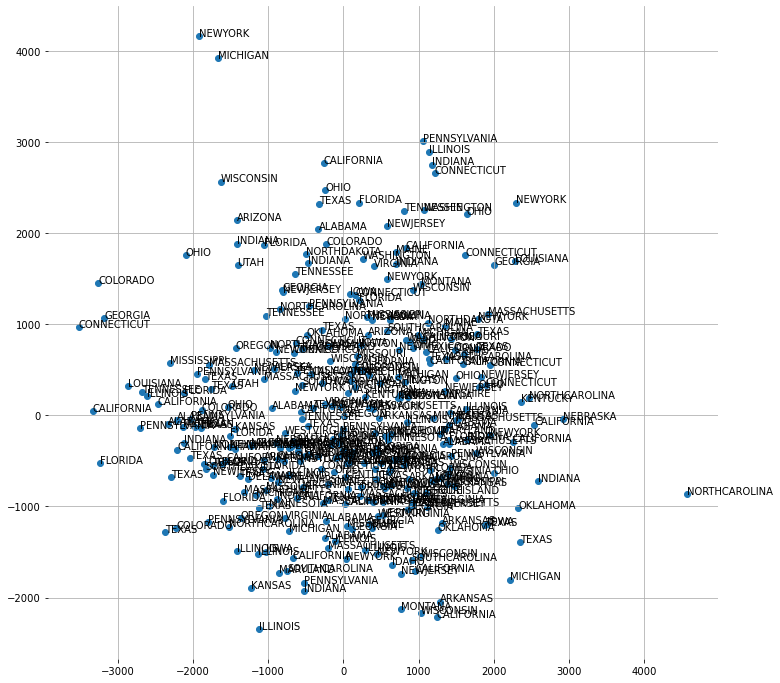

In [40]:
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
c1 = components[:,1]
c2 = components[:,2]
ax.scatter(c1, c2)
for name, x, y in zip(state, c1, c2):
    ax.annotate(name, (x, y))
ax.grid(True)
ax.set_frame_on(False)


In [41]:
components = pca.transform(X)
housing= df['Housing']

In [42]:
X.shape, len(housing)

((329, 7), 329)

In [43]:
import sklearn.decomposition as deco
variance_explained = 0.95
pca = deco.PCA(variance_explained)

In [44]:
pca.fit(X)

PCA(n_components=0.95)

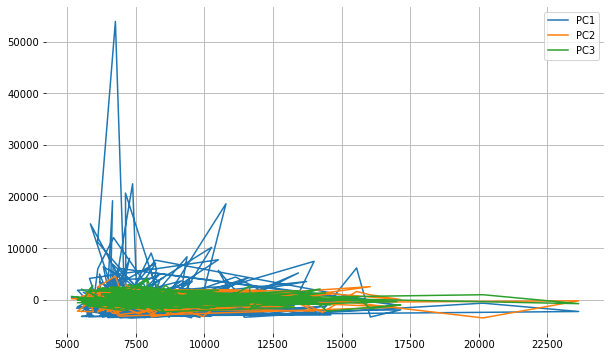

In [45]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
ax.plot(housing, components)
ax.legend(("PC1", "PC2", "PC3"))
ax.grid(True)
ax.set_frame_on(False)

# Do something interesting as you like.

In [46]:
# HousingCost by state
from collections import defaultdict
state_HousingCost = defaultdict(int)
for s, x in zip(df['State'], np.array(df['Housing'])):
    state_HousingCost[s] += x
print(state_HousingCost)

defaultdict(<class 'int'>, {'ALABAMA': 55598, 'ALASKA': 12175, 'ARIZONA': 17469, 'ARKANSAS': 38146, 'CALIFORNIA': 258739, 'COLORADO': 56018, 'CONNECTICUT': 147196, 'DELAWARE': 7927, 'FLORIDA': 154972, 'GEORGIA': 47586, 'HAWAII': 17021, 'IDAHO': 8221, 'ILLINOIS': 112654, 'INDIANA': 79121, 'IOWA': 55716, 'KANSAS': 29794, 'KENTUCKY': 28544, 'LOUISIANA': 57728, 'MAINE': 22253, 'MARYLAND': 36689, 'MASSACHUSETTS': 101465, 'MICHIGAN': 84005, 'MINNESOTA': 32027, 'MISSISSIPPI': 19951, 'MISSOURI': 39474, 'MONTANA': 15458, 'NEBRASKA': 15384, 'NEVADA': 22355, 'NEWHAMPSHIRE': 30583, 'NEWJERSEY': 90417, 'NEWMEXICO': 15355, 'NEWYORK': 113786, 'NORTHCAROLINA': 61367, 'NORTHDAKOTA': 24431, 'OHIO': 100278, 'OKLAHOMA': 27363, 'OREGON': 36668, 'PENNSYLVANIA': 114583, 'RHODEISLAND': 18736, 'SOUTHCAROLINA': 33490, 'SOUTHDAKOTA': 7983, 'TENNESSEE': 32807, 'TEXAS': 191747, 'UTAH': 18787, 'VERMONT': 9673, 'VIRGINIA': 46561, 'WASHINGTON': 74448, 'WESTVIRGINIA': 21022, 'WISCONSIN': 92408, 'WYOMING': 9839})


In [47]:
df_mean_by_sate = df.groupby('State').mean()
df_mean_by_sate

Climate_and_Terrain       Housing  Health_Care_and_Environment  \
State                                                                           
ALABAMA                 508.333333   6177.555556                   863.555556   
ALASKA                  195.000000  12175.000000                   601.000000   
ARIZONA                 562.500000   8734.500000                  1421.500000   
ARKANSAS                495.333333   6357.666667                   987.333333   
CALIFORNIA              741.772727  11760.863636                  1300.000000   
COLORADO                497.166667   9336.333333                  1020.166667   
CONNECTICUT             580.818182  13381.454545                  1773.363636   
DELAWARE                597.000000   7927.000000                  1445.000000   
FLORIDA                 475.842105   8156.421053                   772.842105   
GEORGIA                 543.571429   6798.000000                  1246.571429   
HAWAII                  717.000000  17021.000000                  1298.000000   
IDAHO                   592.000000   8221.000000                   453.000000   
ILLINOIS                500.846154   8665.692308                  1348.538462   
INDIANA                 528.833333   6593.416667                   903.333333   
IOWA                    414.714286   7959.428571                  1150.571429   
KANSAS                  514.250000   7448.500000                  1071.500000   
KENTUCKY                602.750000   7136.000000                  1414.500000   
LOUISIANA               466.625000   7216.000000                   848.625000   
MAINE                   474.666667   7417.666667                   791.000000   
MARYLAND                589.250000   9172.250000                  2375.250000   
MASSACHUSETTS           564.181818   9224.090909                  1365.181818   
MICHIGAN                531.636364   7636.818182                  1357.454545   
MINNESOTA               247.250000   8006.750000                  2165.500000   
MISSISSIPPI             526.666667   6650.333333                   942.000000   
MISSOURI                537.666667   6579.000000                  1340.000000   
MONTANA                 431.000000   7729.000000                   573.000000   
NEBRASKA                419.000000   7692.000000                  1667.000000   
NEVADA                  545.500000  11177.500000                   513.500000   
NEWHAMPSHIRE            470.333333  10194.333333                   728.666667   
NEWJERSEY               600.125000  11302.125000                  2051.625000   
NEWMEXICO               605.500000   7677.500000                  1220.500000   
NEWYORK                 539.769231   8752.769231                  1777.923077   
NORTHCAROLINA           617.777778   6818.555556                  1342.666667   
NORTHDAKOTA             134.000000   8143.666667                   944.333333   
OHIO                    557.384615   7713.692308                  1393.692308   
OKLAHOMA                506.000000   6840.750000                  1076.750000   
OREGON                  709.000000   9167.000000                   783.500000   
PENNSYLVANIA            574.733333   7638.866667                  1346.733333   
RHODEISLAND             586.000000   9368.000000                  1792.000000   
SOUTHCAROLINA           578.600000   6698.000000                  1156.400000   
SOUTHDAKOTA             276.000000   7983.000000                  1041.000000   
TENNESSEE               610.600000   6561.400000                   994.400000   
TEXAS                   476.370370   7101.740741                   716.185185   
UTAH                    520.500000   9393.500000                   914.500000   
VERMONT                 383.000000   9673.000000                  1809.000000   
VIRGINIA                612.333333   7760.166667                  1348.166667   
WASHINGTON              718.111111   8272.000000                   641.444444   
WESTVIRGINIA            595.333333   7007.3333

In [48]:
#std by column
df_sdt_by_state = df.groupby('State').std()
df_sdt_by_state

Climate_and_Terrain      Housing  Health_Care_and_Environment  \
State                                                                          
ALABAMA                  86.429162   550.344917                   416.770654   
ALASKA                         NaN          NaN                          NaN   
ARIZONA                  37.476659   263.750829                   229.809704   
ARKANSAS                 32.426327   718.218537                   755.848839   
CALIFORNIA              140.391267  3175.270837                  1289.138989   
COLORADO                 24.326255  1915.931697                   757.463508   
CONNECTICUT              51.557382  4500.099207                   796.983472   
DELAWARE                       NaN          NaN                          NaN   
FLORIDA                  96.773081  1414.195072                   542.356408   
GEORGIA                  84.033440   832.008013                   960.190061   
HAWAII                         NaN          NaN                          NaN   
IDAHO                          NaN          NaN                          NaN   
ILLINOIS                 25.056091  1930.501679                  1375.896412   
INDIANA                  25.587047   733.611051                   489.993383   
IOWA                     35.887390   843.629235                   601.398608   
KANSAS                   24.459150   491.967817                   478.975643   
KENTUCKY                 53.300250   806.222467                   667.744712   
LOUISIANA                38.250817  1058.917507                   791.835109   
MAINE                    20.792627   624.006677                    38.691084   
MARYLAND                 29.959695  3287.779633                  1860.612690   
MASSACHUSETTS            68.177442  1410.776485                  1353.749816   
MICHIGAN                 27.082366  1316.547061                  1068.666680   
MINNESOTA                61.797384  1661.362167                  1551.648693   
MISSISSIPPI              99.304246   525.591413                   740.034459   
MISSOURI                 34.349187  1059.529141                  1053.345148   
MONTANA                  29.698485   828.729148                   132.936075   
NEBRASKA                 29.698485   797.616449                  1261.478498   
NEVADA                   14.849242  1798.172545                   143.542677   
NEWHAMPSHIRE             67.009950   490.157458                   128.702499   
NEWJERSEY                27.606612  2479.876001                  1144.150582   
NEWMEXICO                75.660426  1011.869804                   894.490078   
NEWYORK                  58.911167  1908.182039                  2107.835480   
NORTHCAROLINA            45.857872   651.512109                   843.423233   
NORTHDAKOTA              25.119713   234.448999                   153.949126   
OHIO                     22.134206   729.632257                   835.084665   
OKLAHOMA                 43.335897   714.819033                   609.790333   
OREGON                   68.697404   643.955485                   574.360224   
PENNSYLVANIA             25.465570   781.564445                  1300.989759   
RHODEISLAND               0.000000   132.936075                   954.594155   
SOUTHCAROLINA            48.880466   755.567667                   317.186538   
SOUTHDAKOTA                    NaN          NaN                          NaN   
TENNESSEE                54.816056   740.429808                   557.687009   
TEXAS                   105.708288  1165.058189                   644.525051   
UTAH                     28.991378   102.530483                  1013.284017   
VERMONT                        NaN          NaN                          NaN   
VIRGINIA                 40.381514  1348.979380                   720.816320   
WASHINGTON              104.235844  1133.645557                   785.128829   
WESTVIRGINIA             46.457866   678.153621                    64.049460   
WISCONSIN      

In [49]:
#std by column
df_std = np.std(df)
print(df_std)

Climate_and_Terrain             120.624521
Housing                        2381.634844
Health_Care_and_Environment    1001.476557
Crime                           356.610986
Transportation                 1448.972122
Education                       320.305054
The_Arts                       4635.223226
Recreation                      806.659443
Economics                      1082.819140
dtype: float64


In [50]:
#mean by column
df_mean = np.mean(df)
print(df_mean)

Climate_and_Terrain             538.732523
Housing                        8346.559271
Health_Care_and_Environment    1185.738602
Crime                           961.054711
Transportation                 4210.082067
Education                      2814.887538
The_Arts                       3150.884498
Recreation                     1845.957447
Economics                      5525.364742
dtype: float64


In [51]:
#Scale all values in the Housing and Crime columns:

scale = StandardScaler()

X = df[['Housing', 'Crime']]

scaledX = scale.fit_transform(X)

print(scaledX)

[[-1.18261591e+00  4.59731459e-01]
 [-6.44750086e-01  4.54123107e-01]
 [-1.10787734e+00 -8.70828788e-02]
 [-1.00122791e+00 -1.24801178e+00]
 [-1.24475810e+00 -5.94638751e-01]
 [-8.66446540e-01 -1.03907935e-01]
 [-6.89677208e-01  1.54214343e+00]
 [-6.68683226e-01 -4.09563129e-01]
 [-7.90448324e-01  1.48467913e-01]
 [ 1.60748435e+00  7.34540716e-01]
 [ 2.41195971e-01  8.60728640e-01]
 [ 8.45808626e-02  1.23087988e+00]
 [-5.59094638e-01  1.47764738e+00]
 [-1.07596648e+00 -8.35797895e-01]
 [-6.97235042e-01 -1.16669067e+00]
 [-4.52025327e-01  1.02897921e+00]
 [-1.12215325e+00  5.83115207e-01]
 [-1.10409842e+00 -3.89933897e-01]
 [ 3.23325834e+00  6.15384540e-02]
 [-1.16961368e-01  1.68235223e+00]
 [ 1.00956169e-01 -3.94118852e-02]
 [ 3.96551441e-01  1.46362650e+00]
 [ 2.31834059e+00  2.80121849e+00]
 [ 1.19010994e-01  5.41052566e-01]
 [ 2.01056881e+00  1.60383530e+00]
 [ 2.37376470e+00 -4.76863355e-01]
 [ 9.96965299e-02 -1.93641570e-01]
 [ 5.90955718e-01  1.44119309e+00]
 [ 6.33363562e-01  1

In [52]:
#predict
#X has been defined in previous run now I need to define y, what I want to predic on the bais of Crime and Housing
# I choose Education
y = df['Education']

#linear model
regr = linear_model.LinearRegression()
regr.fit(scaledX, y)

#what will be the education for housing at 8k and crime at 500?
scaled = scale.transform([[8000, 500]])

predicted_edu = regr.predict([scaled[0]])
print("Education will be:",predicted_edu)

Education will be: [2785.78829959]


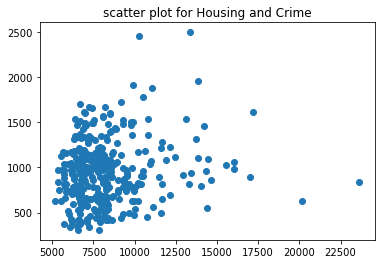

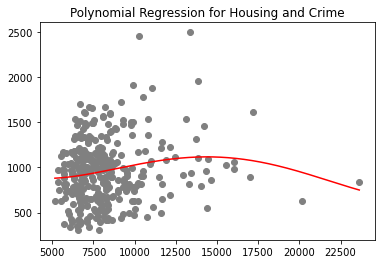

In [53]:
#drawing a scatter plot for Housing and Crime
x = df['Housing']
y = df['Crime']

plt.scatter(x, y)
plt.title("scatter plot for Housing and Crime")
plt.show()

#draw the line of Polynomial Regression for Housing and Crime

mymodel = np.poly1d(np.polyfit(x, y, 4))

myline = np.linspace(5159, 23640, 2498, 308)

plt.scatter(x, y, c='grey')
plt.plot(myline, mymodel(myline), color='r')
plt.title("Polynomial Regression for Housing and Crime")
plt.show()

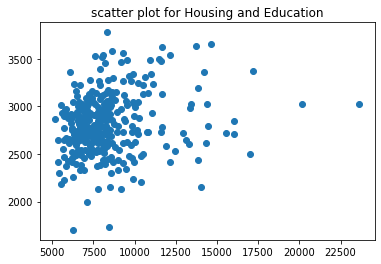

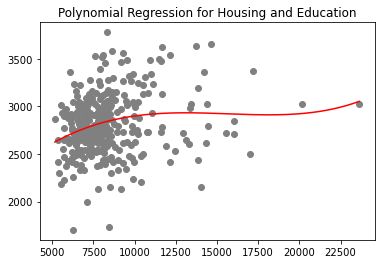

In [54]:
#drawing a scatter plot for Housing and Crime
x = df['Housing']
y = df['Education']

plt.scatter(x, y)
plt.title("scatter plot for Housing and Education")
plt.show()

mymodel = np.poly1d(np.polyfit(x, y, 4))

myline = np.linspace(5159, 23640, 3781)

plt.scatter(x, y, c='grey')
plt.plot(myline, mymodel(myline), color='r')
plt.title("Polynomial Regression for Housing and Education")
plt.show()


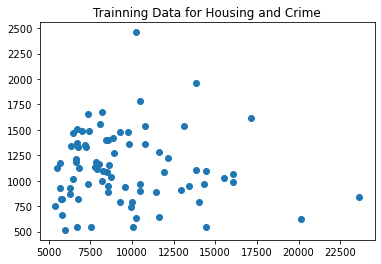

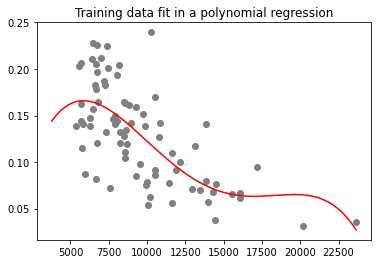

In [55]:
#Split Into Train/Test
#The training set should be a random selection of 80% of the original data.
#The testing set should be the remaining 20%.
x = df['Housing']
y = df['Crime']

train_x = x[:80]
train_y = y[:80]
test_x = x[80:]
test_y = y[80:]

plt.scatter(train_x, train_y)
plt.title("Trainning Data for Housing and Crime")
plt.show()

#How well does my training data fit in a polynomial regression?
np.random.seed(2)

x = np.random.normal(x)
y = np.random.normal(y) / x

train_x = x[:80]
train_y = y[:80]

test_x = x[80:]
test_y = y[80:]

mymodel = np.poly1d(np.polyfit(train_x, train_y, 4))

myline = np.linspace(23640, 3781, 5159)

plt.scatter(train_x, train_y, c="grey")
plt.plot(myline, mymodel(myline),color="red")
plt.title("Training data fit in a polynomial regression")
plt.show()